## Diferencias entre entornos determinista y estocástico
Un entorno determinista posee un estado y una recompensa ante otro estado y una acción; es decir, tiene una única respuesta. 

Por el contrario en un entorno estocástico los estados y recompensas pueden cambiar ante un mismo estado y acción.

**Considerar que en estas prácticas se están tomando estado y observación como sinónimos, a pesar de que tienen algunas pequeñas diferencias y de que la librería gymnasium sí usa la palabra observación.

#### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

#### Clases y funciones

Clase agente

In [2]:
# Se creará un agente que siga un "goodplan" o sea la misma secuencia de acciones 
# porque como programadores ya conocemos el entorno
class AgenteGoodPlan:
    def __init__(self):
        self.acciones = {'Left': 0, 'Down': 1, 'Right': 2, 'Up': 3}  # Diccionario de acciones para cada acción hay un valor numérico
        self.good_plan = 2*['Down'] + ['Right'] + ['Down'] + 2*['Right'] # Lista de acciones que se van a realizar
        self.step = 0
        
    def select_action(self):
        action = self.good_plan[self.step] # Obtener la acción correspondiente a partir del plan hecho (la lista good_plan)
        self.step = (self.step + 1) % len(self.good_plan)   # Incrementar +1 en cada iteración
        return self.acciones[action] # Devolver el valor numérico de la acción
    
    def reset(self):
        self.step = 0

Función para ejecutar un conjunto de acciones

In [3]:
def test(agente, ambiente):
    ambiente.reset()
    agente.reset()
    is_done = False
    t = 0
    
    while not is_done:
        action = agente.select_action()
        estado, recompensa, is_done, trunc, info = ambiente.step(action)
        t += 1
    
    
    return (estado, recompensa, t)

#### Entorno determinista
En un entorno determinista, las probabilidades de terminar en un estado dados una acción y un estado previo son la misma. Es decir sólo existe una opción ante una acción.

Todas las acciones posibles vienen dadas por el siguiente diccionario que es la función de transición. Se puede observar que para cada estado hay un conjunto de acciones, que a su vez contienen la probabilidad, estado siguiente, recompensa y si es un estado terminal o no, respectivamente

In [4]:
# Crear el agente y el ambiente
agente = AgenteGoodPlan()
ambiente = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array', map_name="4x4")

# Función de transición
ambiente.env.P

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

Cantidad de veces que se completa con éxito

In [5]:
episodios = 1000
resueltos = 0

for episodio in range(episodios):
    estado, recompensa, t = test(agente, ambiente)
    
    if estado==15:
        resueltos += 1
        
print("El porcentaje de episodios resueltos es: ", 100*(resueltos/episodios), "%")

El porcentaje de episodios resueltos es:  100.0 %


c:\PYTHON\Python387\lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Render Final

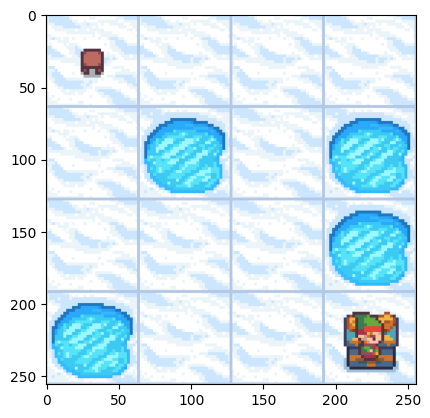

In [6]:
plt.imshow(ambiente.render())

#### Entorno Estocástico
En un entorno determinista las probabilidades de terminar en un estado, dados una acción y un estado previo, son distintas. Es decir, ante una acción es posible terminar en un estado u otro.

La función de transición para este ambiente, es la siguiente. Observar que en este caso la función cambia, teniendo tres dimensiones, una para cada probabilidad de transición de un estado de origen **s** a un estado destino **s'** dada una acción **a**. En este caso hay 1/3 de probabilidad de un estado ante una acción.

In [7]:
ambiente2 = gym.make('FrozenLake-v1', is_slippery=True, render_mode='rgb_array', map_name="4x4")
ambiente2.env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

Se puede observar que si se ejecuta el mismo agente 'goodplan' en este entorno, el porcentaje de éxitos disminuirá

In [8]:
episodios = 1000
resueltos = 0

for episodio in range(episodios):
    estado, recompensa, t = test(agente, ambiente2)
    
    if estado==15:
        resueltos += 1
        
print("El porcentaje de episodios resueltos es: ", 100*(resueltos/episodios), "%")

El porcentaje de episodios resueltos es:  5.0 %


Se puede observar que el porcentaje de éxito disminuyó considerablemente

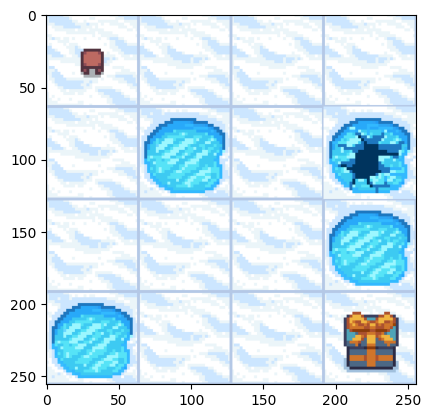

In [9]:
plt.imshow(ambiente2.render())